## Import Data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart = pd.read_csv('../raw_data/heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Basic data definitions and data insights

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
heart['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [5]:
heart['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [6]:
heart['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

## Comparison of features based on sex and age

In [7]:
sex_mean = heart.groupby('Sex').mean()
print(sex_mean)

           Age   RestingBP  Cholesterol  FastingBS       MaxHR   Oldpeak  \
Sex                                                                        
F    52.492228  132.212435   241.196891   0.134715  146.139896  0.668912   
M    53.782069  132.445517   187.513103   0.259310  134.325517  0.945517   

     HeartDisease  
Sex                
F        0.259067  
M        0.631724  


C:\Users\prem\AppData\Local\Temp\ipykernel_11156\1414585998.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sex_mean = heart.groupby('Sex').mean()


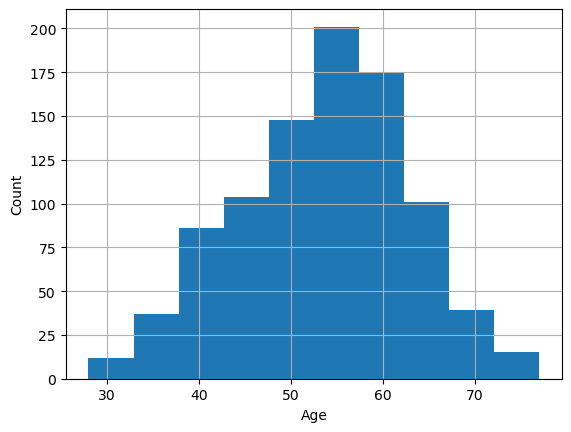

In [8]:
heart.Age.hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Check for any outliers

<Axes: >

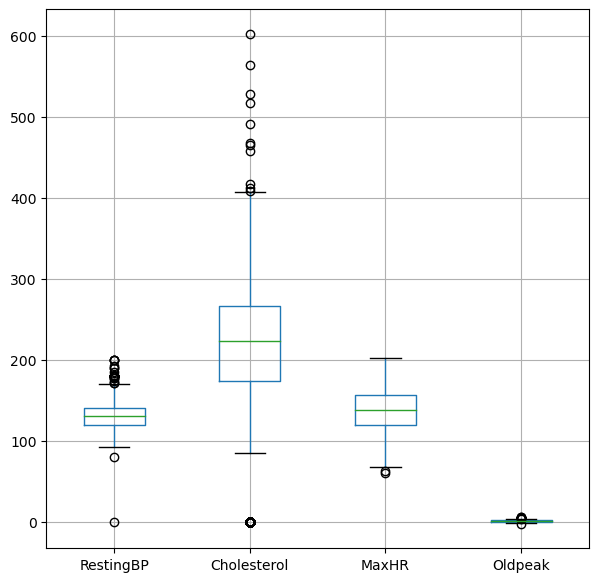

In [9]:
numeric = [ 'RestingBP','Cholesterol','MaxHR','Oldpeak']
heart.boxplot(numeric, figsize=(7,7))

# confirming how relevant outliers can be to the data

In [10]:
mean = heart['Cholesterol'].mean()
std = heart['Cholesterol'].std()

cholnotoutliter = heart[heart['Cholesterol']<mean+std]
cholnotoutliter['HeartDisease'].value_counts()

1    462
0    376
Name: HeartDisease, dtype: int64

## Data Correlations through heatmap and Pairplots

C:\Users\prem\AppData\Local\Temp\ipykernel_11156\3726561585.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heart.corr());


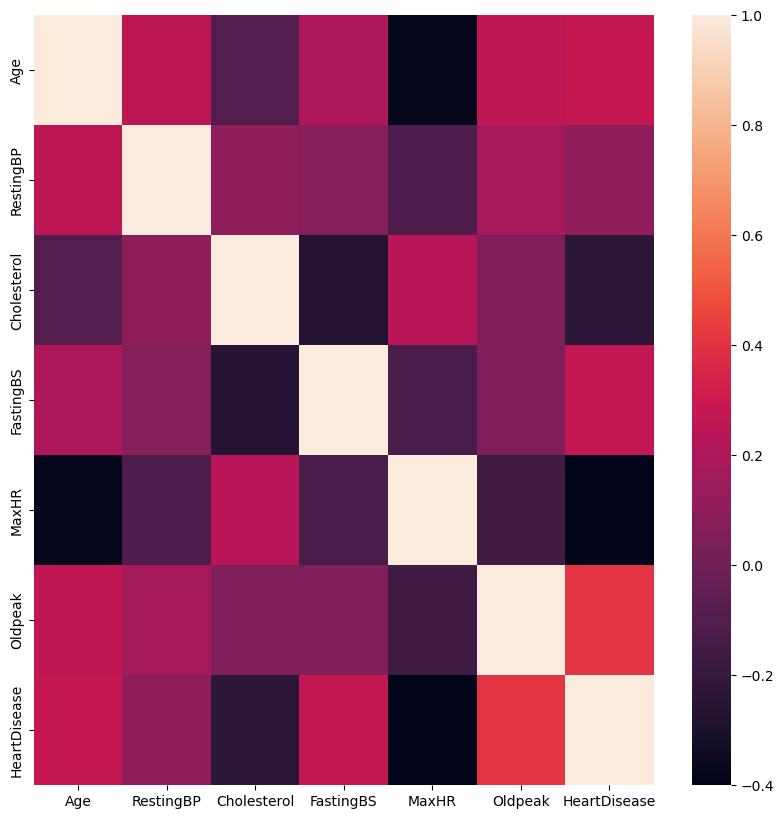

In [11]:
plt.subplots(figsize=(10,10))
sns.heatmap(heart.corr());

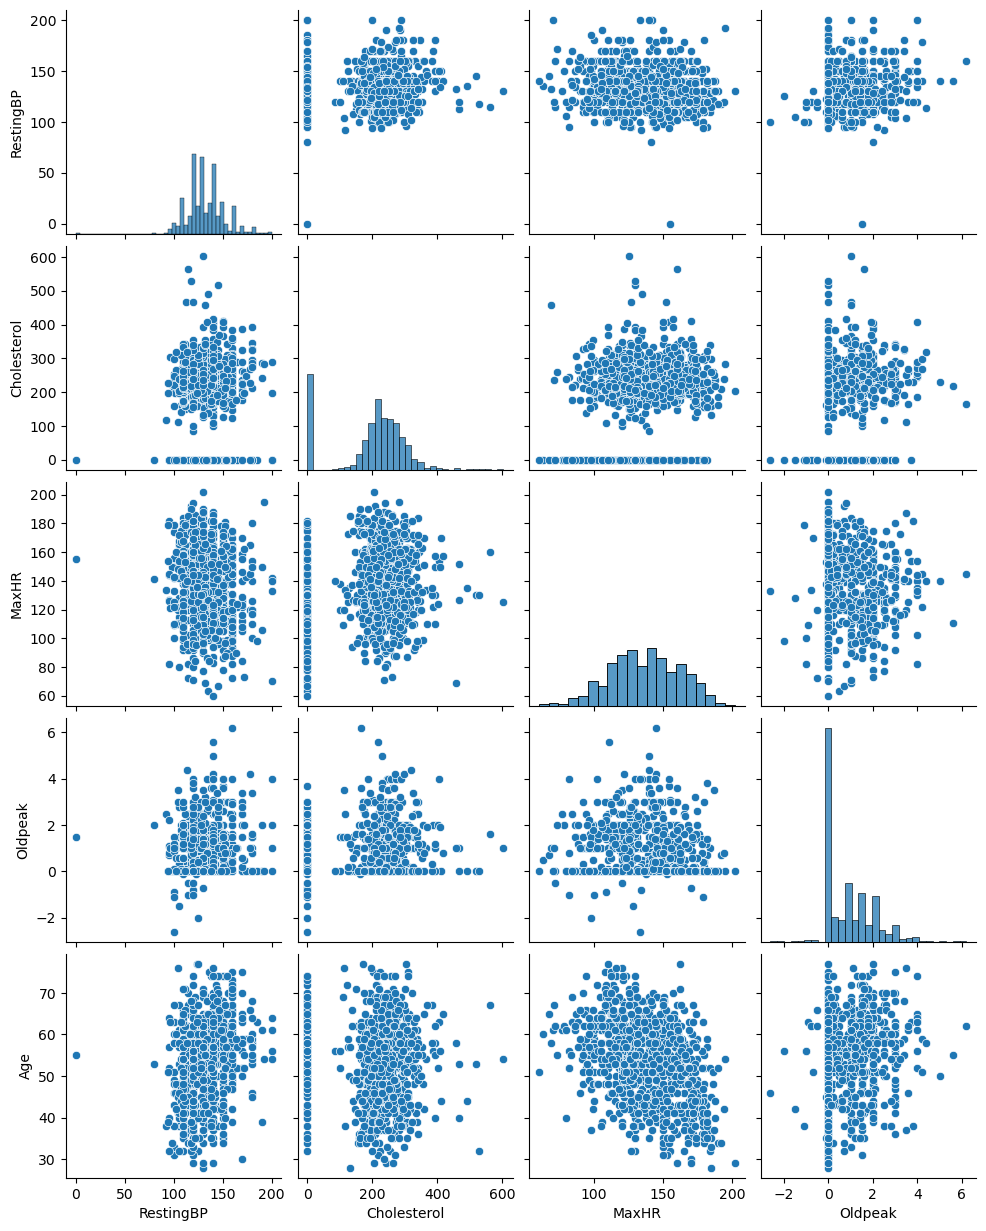

In [12]:
y = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Age']
sns.pairplot(heart, x_vars = numeric, y_vars = y)

In [13]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

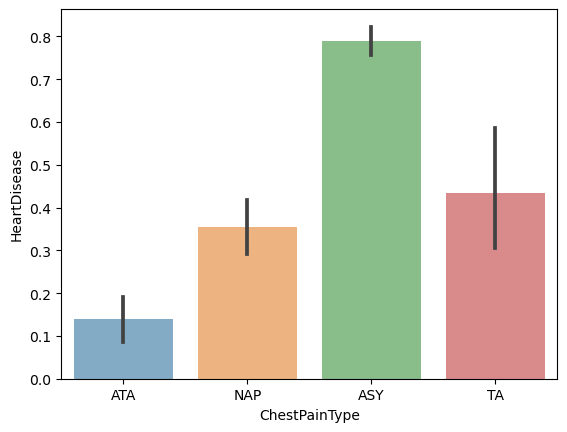

In [14]:
sns.barplot(x='ChestPainType',y='HeartDisease', data=heart, alpha=.6)
plt.show()

In [20]:
heart['age_bin'] = pd.cut(x = heart.Age, bins=[20, 40, 60, 80], labels=['20-40','40-60','60-80'])
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_bin
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,20-40
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,40-60
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,20-40
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,40-60
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,40-60


In [45]:
df = heart.loc[(heart['HeartDisease']==1) & (heart['FastingBS'] == 0) & (heart['RestingBP'] < 131) & (heart['Cholesterol']<151)]
df['hereditary'] = 1
heart_nohereditary = heart[~((heart['HeartDisease']==1) & (heart['FastingBS'] == 0) & (heart['RestingBP'] < 131) & (heart['Cholesterol']<151))]
heart_nohereditary['hereditary'] = 0
heart2 = heart_nohereditary.append(df)
heart2

C:\Users\prem\AppData\Local\Temp\ipykernel_11156\570110094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hereditary'] = 1
C:\Users\prem\AppData\Local\Temp\ipykernel_11156\570110094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_nohereditary['hereditary'] = 0
C:\Users\prem\AppData\Local\Temp\ipykernel_11156\570110094.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  heart2 = heart_nohereditary.appe

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_bin,hereditary
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,20-40,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,40-60,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,20-40,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,40-60,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,40-60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1,40-60,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1,40-60,1
541,76,M,NAP,104,113,0,LVH,120,N,3.5,Down,1,60-80,1
661,49,M,NAP,118,149,0,LVH,126,N,0.8,Up,1,40-60,1


In [25]:
features = ['RestingBP', 'Cholesterol', 'MaxHR']
heart_binned = pd.pivot_table(heart, index=['HeartDisease','age_bin'],aggfunc=[np.mean])
heart_binned

C:\Users\prem\AppData\Local\Temp\ipykernel_11156\414794632.py:2: FutureWarning: The operation <function mean at 0x000001FB232EA7A0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  heart_binned = pd.pivot_table(heart, index=['HeartDisease','age_bin'],aggfunc=[np.mean])


mean                                              \
                            Age Cholesterol FastingBS       MaxHR   Oldpeak   
HeartDisease age_bin                                                          
0            20-40    36.245902  226.163934  0.016393  161.704918  0.177049   
             40-60    50.453287  228.128028  0.107266  147.823529  0.392388   
             60-80    65.566667  223.250000  0.200000  135.950000  0.718333   
1            20-40    36.906250  170.750000  0.312500  145.875000  0.943750   
             40-60    53.114286  182.019048  0.314286  129.285714  1.218095   
             60-80    65.124224  165.080745  0.378882  120.844720  1.449689   

                                  
                       RestingBP  
HeartDisease age_bin              
0            20-40    127.672131  
             40-60    129.356401  
             60-80    136.700000  
1            20-40    118.468750  
             40-60    133.606349  
             60-80    138.440994

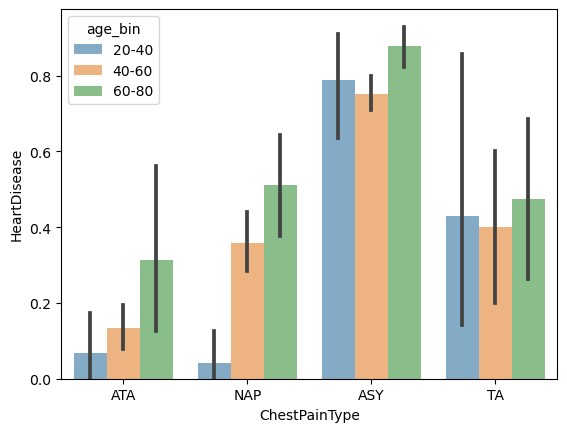

In [28]:
sns.barplot(x='ChestPainType',y='HeartDisease', data=heart, alpha=.6, hue='age_bin')
plt.show()

In [47]:
heart2.to_csv('../data/heart2.csv', index=False)